In [1]:
import sys
import pprint
from pathlib import Path
project_root = str(Path.cwd().parent)
if project_root not in sys.path:
 sys.path.append(project_root)
 
from pipeline.utils.general import load_json_data
from pipeline.utils.path_manager import PathManager
from evaluation.analysis.tail_posture_analysis.tail_posture_analyzer import TailPostureAnalyzer
from evaluation.analysis.tail_posture_analysis.tail_posture_visualization import TailPostureVisualizer

path_manager = PathManager()

## Load config

In [2]:
config_tail_posture_evaluation = load_json_data('configs/config_tail_posture.json')

pprint.pprint(config_tail_posture_evaluation, compact=True)

{'analysis_window_days': [1, 3, 5, 7],
 'comparison_metrics': ['value_at_removal', '1d_window_avg', '3d_window_avg',
                        '5d_window_avg', '7d_window_avg', '1d_window_slope',
                        '3d_window_slope', '5d_window_slope', '7d_window_slope',
                        'abs_change_1d', 'abs_change_3d', 'abs_change_5d',
                        'abs_change_7d'],
 'comparison_stats_filename': 'outbreak_vs_control_comparison.csv',
 'component_analysis_window_days': 10,
 'component_timepoint_days': [0, 1, 3, 5, 7],
 'confidence_level': 0.95,
 'control_components_filename': 'control_posture_components.csv',
 'control_date_margin': 5,
 'control_samples_per_pen': 5,
 'control_stats_filename': 'control_statistics.csv',
 'days_before_list': [1, 3, 5, 7],
 'figure_dpi': 600,
 'interpolate_resampled_data': True,
 'max_allowed_consecutive_missing_days': 3,
 'max_allowed_missing_days_pct': 50.0,
 'min_control_analysis_dates': 2,
 'min_control_dates_threshold': 8,
 'min_o

## Run analysis

In [3]:
# Initialize the analyzer with config
analyzer = TailPostureAnalyzer(config_tail_posture_evaluation)

# Load and preprocess data
analyzer.load_data()

# Preprocess the data
analyzer.preprocess_monitoring_results()

# Run standard analyses
analyzer.analyze_pre_outbreak_statistics()
analyzer.analyze_control_pen_statistics()
analyzer.compare_outbreak_vs_control_statistics()
analyzer.analyze_individual_outbreak_variation()
analyzer.analyze_posture_components()

2025-07-09 09:09:19,087 - INFO - Loading monitoring pipeline data...
2025-07-09 09:09:25,546 - WARNING - Missing 1 day(s) for Kamera5/221004_221104: [datetime.date(2022, 11, 3)]
2025-07-09 09:09:27,577 - WARNING - Missing 17 day(s) for Kamera5/220510_220529: [datetime.date(2022, 5, 10), datetime.date(2022, 5, 12), datetime.date(2022, 5, 14), datetime.date(2022, 5, 15), datetime.date(2022, 5, 16), datetime.date(2022, 5, 18), datetime.date(2022, 5, 19), datetime.date(2022, 5, 20), datetime.date(2022, 5, 21), datetime.date(2022, 5, 22), datetime.date(2022, 5, 23), datetime.date(2022, 5, 24), datetime.date(2022, 5, 25), datetime.date(2022, 5, 26), datetime.date(2022, 5, 27), datetime.date(2022, 5, 28), datetime.date(2022, 5, 29)]
2025-07-09 09:09:27,588 - WARNING - Dataframe became empty after time filtering: Kamera5_2022_05_11_08_18_23-09_18_23.csv. Skipping.
2025-07-09 09:09:27,599 - WARNING - Dataframe became empty after time filtering: Kamera5_2022_05_13_08_18_21-09_18_21.csv. Skipping

{'outbreak_components':        pen       datespan  days_before_removal       date  upright_tails  \
 0    Pen 1  220228_220328                    0 2022-03-23       0.387648   
 1    Pen 1  220228_220328                    1 2022-03-22       0.528087   
 2    Pen 1  220228_220328                    2 2022-03-21       0.682334   
 3    Pen 1  220228_220328                    3 2022-03-20       0.767497   
 4    Pen 1  220228_220328                    4 2022-03-19       0.855052   
 ..     ...            ...                  ...        ...            ...   
 215  Pen 6  230515_230622                    6 2023-05-26       0.802259   
 216  Pen 6  230515_230622                    7 2023-05-25       0.791398   
 217  Pen 6  230515_230622                    8 2023-05-24       0.787130   
 218  Pen 6  230515_230622                    9 2023-05-23       0.783088   
 219  Pen 6  230515_230622                   10 2023-05-22       0.783680   
 
      hanging_tails  posture_diff     group  
 0   

## Analysis, visualizations and summary report

In [3]:
visualizer = TailPostureVisualizer(config_tail_posture_evaluation)

# Load and preprocess data
visualizer.load_data()
visualizer.preprocess_monitoring_results()

# Run standard analyses
visualizer.analyze_pre_outbreak_statistics()
visualizer.analyze_control_pen_statistics()
visualizer.compare_outbreak_vs_control_statistics()
visualizer.analyze_individual_outbreak_variation()
visualizer.analyze_posture_components()

summary = visualizer.generate_summary_report()

2025-07-09 10:14:37,873 - INFO - Setting plot style: Font=serif, BaseSize=11pt, Format=png, DPI=600
2025-07-09 10:14:37,875 - INFO - Dissertation quality plotting style set.
2025-07-09 10:14:37,881 - INFO - Loading monitoring pipeline data...
2025-07-09 10:14:44,466 - WARNING - Missing 1 day(s) for Kamera5/221004_221104: [datetime.date(2022, 11, 3)]
2025-07-09 10:14:46,529 - WARNING - Missing 17 day(s) for Kamera5/220510_220529: [datetime.date(2022, 5, 10), datetime.date(2022, 5, 12), datetime.date(2022, 5, 14), datetime.date(2022, 5, 15), datetime.date(2022, 5, 16), datetime.date(2022, 5, 18), datetime.date(2022, 5, 19), datetime.date(2022, 5, 20), datetime.date(2022, 5, 21), datetime.date(2022, 5, 22), datetime.date(2022, 5, 23), datetime.date(2022, 5, 24), datetime.date(2022, 5, 25), datetime.date(2022, 5, 26), datetime.date(2022, 5, 27), datetime.date(2022, 5, 28), datetime.date(2022, 5, 29)]
2025-07-09 10:14:46,541 - WARNING - Dataframe became empty after time filtering: Kamera5_2

## Visualizations

2025-07-09 10:17:12,406 - INFO - Visualizing descriptive pre-outbreak patterns...
2025-07-09 10:17:12,407 - INFO - Setting plot style: Font=serif, BaseSize=11pt, Format=png, DPI=600
/home/jan-hendrik/home/PigMonitoringResearch/evaluation/analysis/tail_posture_analysis/tail_posture_visualization.py:374: UserWarning: The handle <matplotlib.collections.PolyCollection object at 0x7f8599fc9bb0> has a label of '_child21' which cannot be automatically added to the legend.
  ax2.legend(handles=legend_handles_traj, loc='lower left', frameon=True, facecolor='white', edgecolor=COLORS.get('grid', 'lightgrey'), fontsize=9)
2025-07-09 10:17:14,383 - INFO - Saved pre-outbreak pattern visualization to results/results_tail_posture_evaluation/descriptive_pre_outbreak_patterns.png


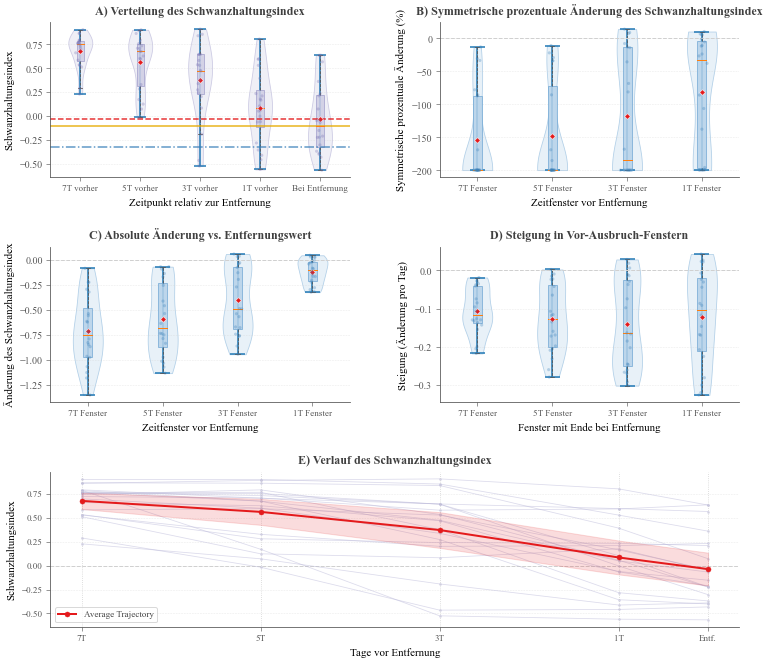

2025-07-09 10:17:14,684 - INFO - Saved visualization statistics to results/results_tail_posture_evaluation/visualization_stats/pre_outbreak_patterns_statistics_20250709.csv


{'mean_value_at_removal': -0.03606547010599507,
 'median_value_at_removal': -0.1096846213820207,
 'p25_value_at_removal': -0.31972834633497776,
 'p10_value_at_removal': -0.4034071822687822,
 'n_analyzed': 20}

In [4]:
visualizer.visualize_pre_outbreak_patterns(show=True)

2025-07-09 10:07:46,231 - INFO - Visualizing comparison between outbreak and control pens...
2025-07-09 10:07:46,233 - INFO - Setting plot style: Font=serif, BaseSize=11pt, Format=png, DPI=600
2025-07-09 10:07:46,346 - INFO - Comparing outbreak vs control pen statistics...
2025-07-09 10:07:46,348 - INFO - Comparison for value_at_removal: Outbreak=-0.036±0.367, Control=0.726±0.124, p=0.0000, Significant=True, Effect Size=4.10
2025-07-09 10:07:46,349 - INFO - Comparison for 1d_window_avg: Outbreak=0.022±0.367, Control=0.726±0.119, p=0.0000, Significant=True, Effect Size=3.84
2025-07-09 10:07:46,350 - INFO - Comparison for 3d_window_avg: Outbreak=0.162±0.364, Control=0.727±0.112, p=0.0000, Significant=True, Effect Size=3.17
2025-07-09 10:07:46,352 - INFO - Comparison for 5d_window_avg: Outbreak=0.288±0.343, Control=0.726±0.105, p=0.0000, Significant=True, Effect Size=2.61
2025-07-09 10:07:46,353 - INFO - Comparison for 7d_window_avg: Outbreak=0.383±0.297, Control=0.723±0.100, p=0.0000, Si

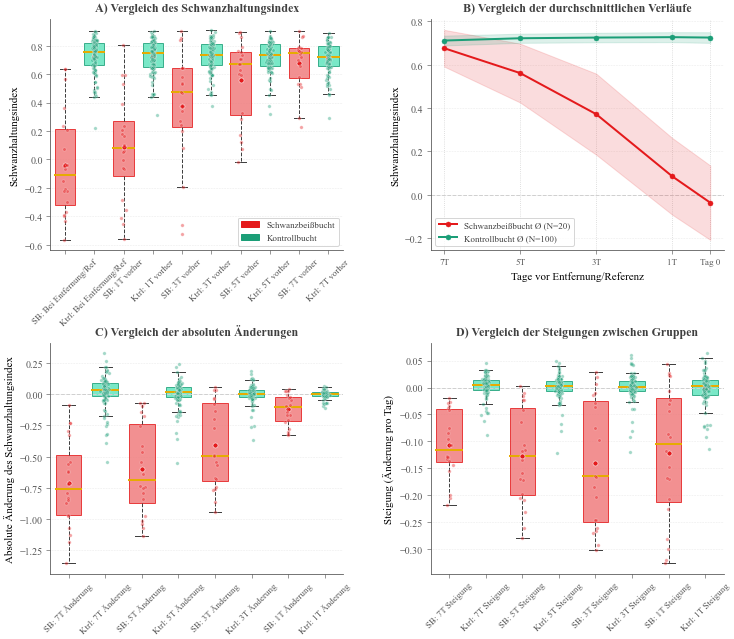

2025-07-09 10:07:48,592 - INFO - Comparing outbreak vs control pen statistics...
2025-07-09 10:07:48,594 - INFO - Comparison for value_at_removal: Outbreak=-0.036±0.367, Control=0.726±0.124, p=0.0000, Significant=True, Effect Size=4.10
2025-07-09 10:07:48,595 - INFO - Comparison for 1d_window_avg: Outbreak=0.022±0.367, Control=0.726±0.119, p=0.0000, Significant=True, Effect Size=3.84
2025-07-09 10:07:48,596 - INFO - Comparison for 3d_window_avg: Outbreak=0.162±0.364, Control=0.727±0.112, p=0.0000, Significant=True, Effect Size=3.17
2025-07-09 10:07:48,597 - INFO - Comparison for 5d_window_avg: Outbreak=0.288±0.343, Control=0.726±0.105, p=0.0000, Significant=True, Effect Size=2.61
2025-07-09 10:07:48,599 - INFO - Comparison for 7d_window_avg: Outbreak=0.383±0.297, Control=0.723±0.100, p=0.0000, Significant=True, Effect Size=2.26
2025-07-09 10:07:48,600 - INFO - Comparison for 1d_window_slope: Outbreak=-0.122±0.124, Control=-0.002±0.029, p=0.0001, Significant=True, Effect Size=2.13
2025-

True

In [5]:
visualizer.visualize_comparison_with_controls(show=True)

2025-07-09 10:17:23,312 - INFO - Visualizing individual variation in outbreak patterns...
2025-07-09 10:17:23,313 - INFO - Setting plot style: Font=serif, BaseSize=11pt, Format=png, DPI=600
2025-07-09 10:17:24,933 - INFO - Saved individual variation visualization to results/results_tail_posture_evaluation/individual_variation_analysis.png


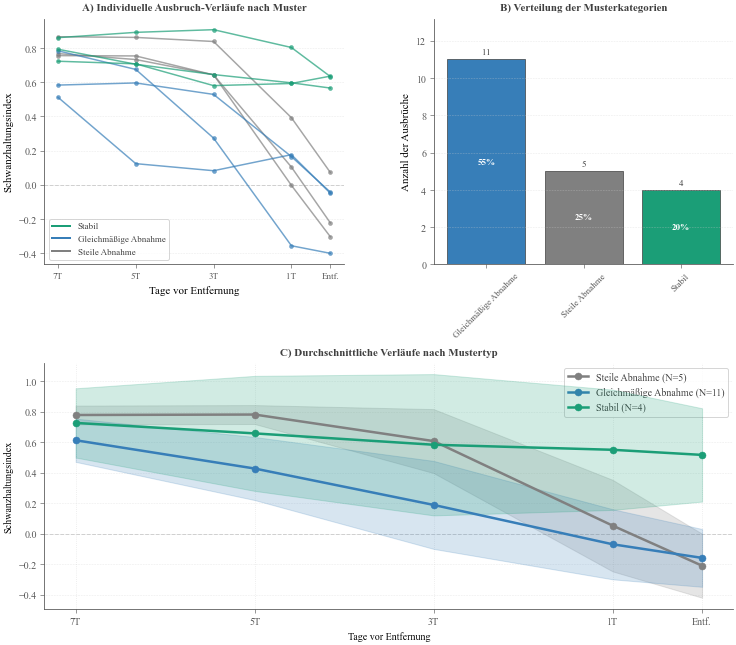

2025-07-09 10:17:25,086 - INFO - Saved visualization statistics to results/results_tail_posture_evaluation/visualization_stats/individual_variation_statistics_20250709.csv


True

In [5]:
visualizer.visualize_individual_variation(show=True)

2025-07-09 10:17:27,341 - INFO - Visualizing posture components (upright vs. hanging tails)...
2025-07-09 10:17:27,343 - INFO - Setting plot style: Font=serif, BaseSize=11pt, Format=png, DPI=600
2025-07-09 10:17:27,344 - INFO - Analyzing individual posture components (upright vs. hanging tails)...
2025-07-09 10:17:27,607 - INFO - Saved posture component data to results/results_tail_posture_evaluation/posture_components.csv
2025-07-09 10:17:27,615 - INFO - Saved control posture component data to results/results_tail_posture_evaluation/control_posture_components.csv
2025-07-09 10:17:28,964 - INFO - Saved posture component visualization to results/results_tail_posture_evaluation/posture_component_analysis.png


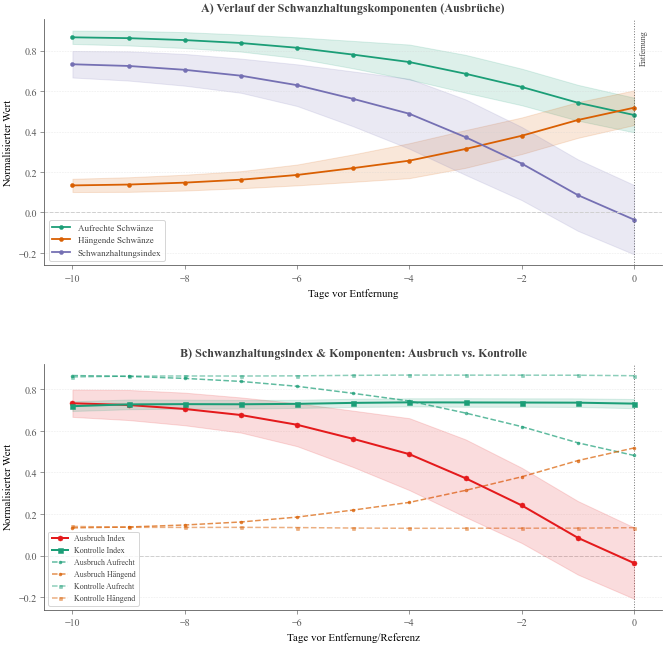

2025-07-09 10:17:29,099 - INFO - Saved visualization statistics to results/results_tail_posture_evaluation/visualization_stats/posture_components_statistics_20250709.csv


{'outbreak_components':        pen       datespan  days_before_removal       date  upright_tails  \
 0    Pen 1  220228_220328                    0 2022-03-23       0.387648   
 1    Pen 1  220228_220328                    1 2022-03-22       0.528087   
 2    Pen 1  220228_220328                    2 2022-03-21       0.682334   
 3    Pen 1  220228_220328                    3 2022-03-20       0.767497   
 4    Pen 1  220228_220328                    4 2022-03-19       0.855052   
 ..     ...            ...                  ...        ...            ...   
 215  Pen 6  230515_230622                    6 2023-05-26       0.802259   
 216  Pen 6  230515_230622                    7 2023-05-25       0.791398   
 217  Pen 6  230515_230622                    8 2023-05-24       0.787130   
 218  Pen 6  230515_230622                    9 2023-05-23       0.783088   
 219  Pen 6  230515_230622                   10 2023-05-22       0.783680   
 
      hanging_tails  posture_diff     group  
 0   

In [6]:
visualizer.visualize_posture_components(show=True)